This is our Data Visualization in Python Jupyter Notebook. We will be focusing on the matplotlib library to take our data and do some data visualizations with it. 

The first thing we need to do is import the libraries we will be using. Because we are all using the Anaconda software distribution today, Anaconda comes with a lot of functionality installed on top of the base python 
libraries. This includes the pandas and matplotlib packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt     #I am pretty sure pyplot is the original functionality of matplotlib
import matplotlib.ticker as ticker
import numpy as np


First we need to read in some data, so we can then work with it. This is a CSV sheet of career stats for professional baseball player, Mike Trout. Baseball is a numbers game so this gives us a nice, easy to use dataset to work use.

In [21]:
df = pd.read_csv("MikeTroutData.csv")

## Pandas Dataframes ##

First, let's take a look at the data set to see that it read correctly. We have read the data into a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe). A pandas dataframe is a 2-dimensional labeled data structure with columns. You can think of it like a spreadsheet. It is the most commonly used pandas object. Along with the data, you can pass index (row labels) or columns as arguments. This is not to be confused with a pandas series object, which is a 1-Dimensional array of data.

In [22]:
print(df)

   Year  Age    G   AB    R    H  HR     BA    Salary  Awards
0  2011   19   40  123   20   27   5  0.220     36000       0
1  2012   20  139  559  129  182  30  0.326    492500       4
2  2013   21  157  589  109  190  27  0.323    510000       3
3  2014   22  157  602  115  173  36  0.287   1000000       3
4  2015   23  159  575  104  172  41  0.299   6083000       3
5  2016   24  159  549  123  173  29  0.315  16083000       3
6  2017   25  114  402   92  123  33  0.306  20083000       2
7  2018   26  140  471  101  147  39  0.312  34083000       3
8  2019   27  134  470  110  137  45  0.291  36833333       1


Now let's take a look to see how we can access the column headers in this dataframe. You can access them all, or you can access individual columns with the same syntax as a python dictionary, using key-value pairs.

In [23]:
print(df.keys())
print()
print(df['Year'])

Index(['Year', 'Age', 'G', 'AB', 'R', 'H', 'HR', 'BA', 'Salary', 'Awards'], dtype='object')

0    2011
1    2012
2    2013
3    2014
4    2015
5    2016
6    2017
7    2018
8    2019
Name: Year, dtype: int64


I am renaming some of the columns we will be using, just for the sake of simplicity. It is easier to refer to these variable names than the entire syntax of each column.

In [24]:
year = df['Year']
hits = df['H']
at_bats = df['AB']
home_runs = df['HR']
salary = df['Salary']

## Matplotlib Plots ##

Now we will begin plotting in [matplotlib](https://matplotlib.org/). Because we have our data stored in a pandas dataframe. We can now analyze it how we like. I'll be working with some of the basic plot types. This will barely scratch the surface. I will also be adding some customization and formatting to show you that you can basically customize your plots to look however you like.


## Bar Plots

This is a very simple plot of Mike Trout's hits per year. Let's start from the bottom

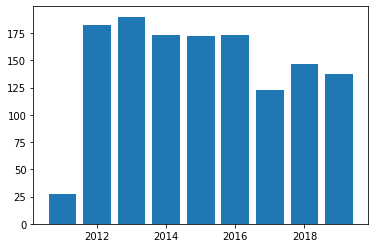

In [26]:
plt.bar(year, hits)
plt.show()

So as you see, I've got # of Hits on the Y Axis, and Year on the X Axis. But what are the year and hits objects?

In [27]:
print(type(year))
print(type(hits))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


As you see, these are pandas Series objects. Again, a series is a 1-Dimensional array of data. I'll be transforming my pandas dataframe to extract different series of objects, so I can plot them using matplotlib.

Our first plot was as basic as it gets. Let's add some labels to make it look a little better.

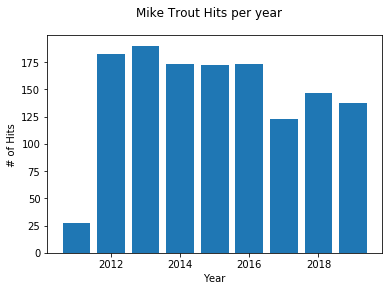

In [28]:
plt.xlabel('Year')
plt.ylabel('# of Hits')
plt.suptitle('Mike Trout Hits per year')
plt.bar(year, hits)
plt.show()

## Horizontal Bar Plots

Let's turn our bar plot sideways

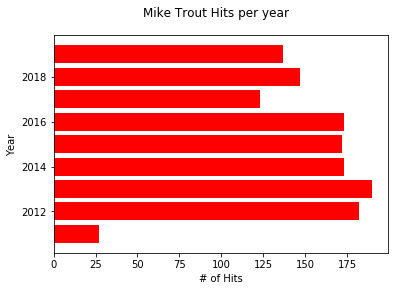

In [30]:

plt.xlabel('# of Hits')
plt.ylabel('Year')
plt.suptitle('Mike Trout Hits per year')
plt.barh(year, hits, color='red')       #notice I changed the color argument. Blue is the default color
plt.show()

## Line Plot

We can also do simple line plots. Here is hits per year as a line plot.

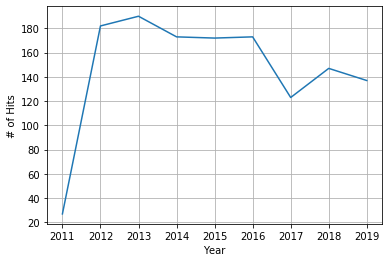

In [32]:
plt.xlabel('Year')
plt.ylabel('# of Hits')
plt.grid()
plt.plot(year, hits)
plt.show()

## Combined plots

You can also put them together. 
In this plot, I have the # of hits plotted in blue as a bar chart, and number of At Bats in red as a line graph. 

But notice, our old labels don't work anymore!

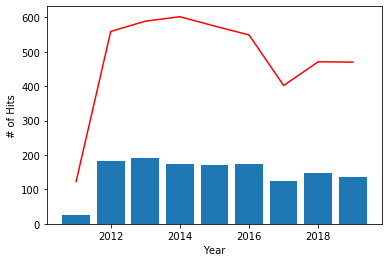

In [33]:
plt.xlabel('Year')
plt.ylabel('# of Hits')
plt.plot(year, at_bats, color='red')
plt.bar(year, hits)
plt.show()

## Legends

A legend is probably the right thing to bring more clarity to our plot

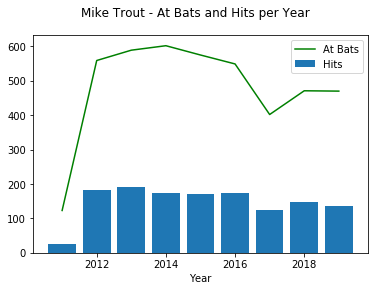

In [34]:
plt.xlabel('Year')
plt.suptitle('Mike Trout - At Bats and Hits per Year')
plt.plot(year, at_bats, color='green', label='At Bats')
plt.bar(year, hits, label='Hits')
plt.legend()         #makes the legend happen!
plt.show()

## Stacked Bar Chart

We can stack bar charts on top of eachother

In this chart, I am literally stacking home runs on top of hits. But you can get a visual picture on the ratio of home runs to overall hits

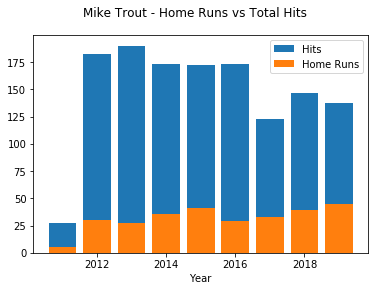

In [35]:
plt.xlabel('Year')
plt.suptitle('Mike Trout - Home Runs vs Total Hits')


plt.bar(year, hits, label='Hits')
plt.bar(year, home_runs, label='Home Runs')

plt.legend()
plt.show()

## Grouped Bar Chart

In order to have my bar charts side by side, I need to move one of them to the side, and also make the bars skinnier so that everything fits

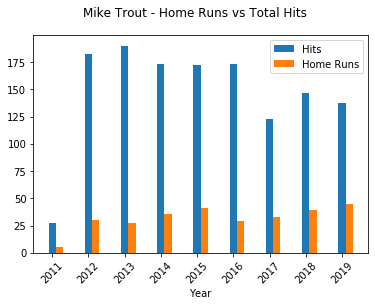

In [39]:
plt.xlabel('Year')
plt.suptitle('Mike Trout - Home Runs vs Total Hits')

plt.xticks(rotation=45)         #rotates labels by 45 degrees
plt.xticks(year)                #shows all years in label

plt.bar(year, hits, width=.2, label='Hits')
plt.bar(year+.2, home_runs, width=.2, label='Home Runs')        #moved the bars around manually
plt.legend()
plt.show()

## Labels

I can add labels on my figures to show exact values

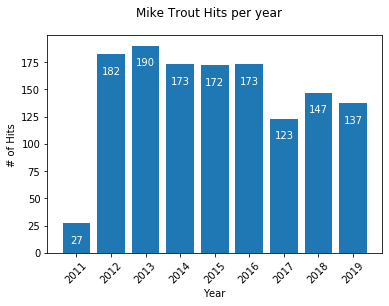

In [40]:
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.xticks(year)                #shows all years in label

plt.ylabel('# of Hits')           
plt.suptitle('Mike Trout Hits per year')

for bar in plt.bar(year, hits):        
    plt.text(bar.get_x() + .4,              #x position of label
             bar.get_height() - 20,           #y position of label
             bar.get_height(),              #actual value of label
             ha='center',
             va='bottom',
             color='white')

## Math with Dataframes

Rembember, you can do math with your dataframe objects!

In [42]:
cost_per_home_run = salary/home_runs

print(type(cost_per_home_run))
print(cost_per_home_run)

<class 'pandas.core.series.Series'>
0      7200.000000
1     16416.666667
2     18888.888889
3     27777.777778
4    148365.853659
5    554586.206897
6    608575.757576
7    873923.076923
8    818518.511111
dtype: float64


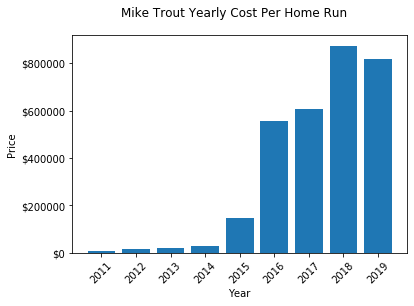

In [43]:
fig, ax = plt.subplots()

plt.xlabel('Year')
plt.xticks(rotation=45)
plt.xticks(year)

formatter = ticker.FormatStrFormatter('$%.0f')     #formatting y axis as dollar amounts
ax.yaxis.set_major_formatter(formatter)

plt.ylabel('Price')           
plt.suptitle('Mike Trout Yearly Cost Per Home Run')
plt.bar(year, cost_per_home_run)
plt.show()

## Scatter Plot

Now I'll give you some other examples of random plots, just to give you more ideas of what is possible

In [45]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
print(x)
area = np.pi*3
print(area)

[0.2284678  0.80720959 0.54761593 0.04409327 0.94335631 0.72236201
 0.45702196 0.6473722  0.92741817 0.10795803 0.42563135 0.97535708
 0.31068142 0.87259616 0.60293592 0.43578129 0.05071781 0.70669993
 0.20211687 0.87163157 0.72670763 0.42895274 0.48456398 0.24302116
 0.17739531 0.12838683 0.01600738 0.46025224 0.69894    0.82048214
 0.37814855 0.00249725 0.82514469 0.86625807 0.08297827 0.85599144
 0.64177922 0.28208034 0.53239056 0.91354012 0.56693594 0.34087158
 0.56794304 0.96210162 0.97383736 0.90819142 0.37459    0.12979734
 0.19676519 0.00269074]
9.42477796076938


Text(0.5, 1.0, 'Scatter plot pythonspot')

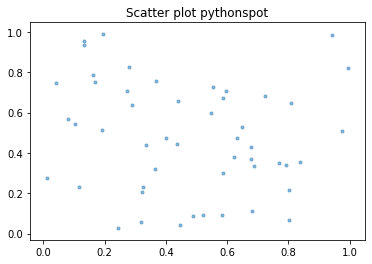

In [19]:
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot pythonspot')